In [1]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train , y_train),(x_test , y_test)= cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

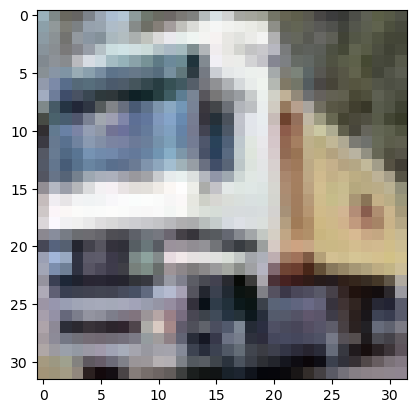

In [6]:
plt.imshow(x_train [1])

In [7]:
y_train[1]

array([9], dtype=uint8)

#### 0-Airplane  1-Automobile  2-Bird  3-Cat  4-Deer  5-Dog  6-Frog  7-Horse  8-Ship  9-Truck

In [8]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
num_class = y_test.shape[1] #10

In [11]:
x_train.shape[1:]

(32, 32, 3)

In [12]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train = x_train / 255.0
X_test = x_test / 255.0

## Building the Model

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=50)

Epoch 1/20
1000/1000 [==============================] - 226s 214ms/step - loss: 1.4838 - accuracy: 0.4726 - val_loss: 1.1785 - val_accuracy: 0.5708
Epoch 2/20
1000/1000 [==============================] - 195s 195ms/step - loss: 1.0461 - accuracy: 0.6317 - val_loss: 0.8582 - val_accuracy: 0.7016
Epoch 3/20
1000/1000 [==============================] - 190s 190ms/step - loss: 0.8959 - accuracy: 0.6879 - val_loss: 0.7972 - val_accuracy: 0.7212
Epoch 4/20
1000/1000 [==============================] - 184s 184ms/step - loss: 0.8112 - accuracy: 0.7199 - val_loss: 0.7501 - val_accuracy: 0.7394
Epoch 5/20
1000/1000 [==============================] - 174s 174ms/step - loss: 0.7468 - accuracy: 0.7421 - val_loss: 0.6532 - val_accuracy: 0.7657
Epoch 6/20
1000/1000 [==============================] - 134s 134ms/step - loss: 0.6903 - accuracy: 0.7599 - val_loss: 0.6467 - val_accuracy: 0.7739
Epoch 7/20
1000/1000 [==============================] - 132s 132ms/step - loss: 0.6616 - accuracy: 0.7707 - val_

In [19]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [20]:
import pandas as pd

<Axes: >

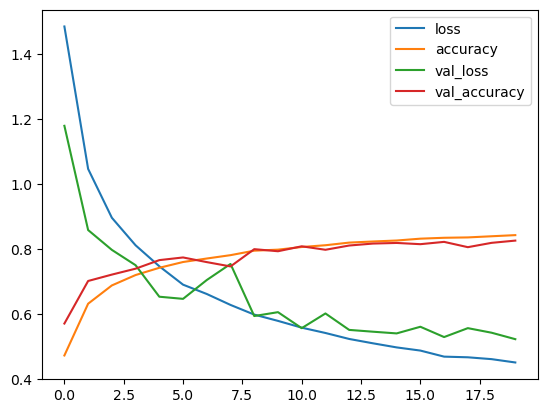

In [21]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

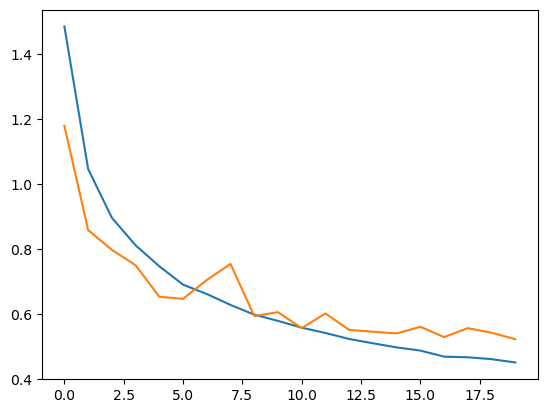

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

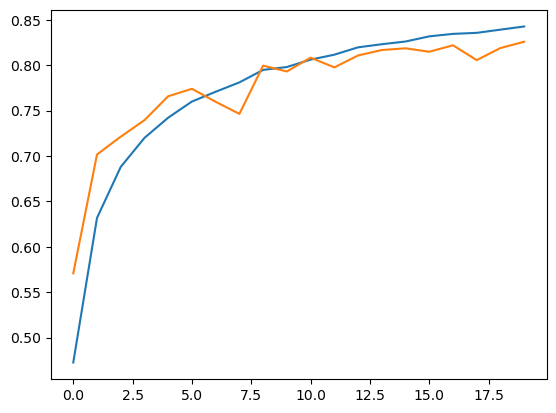

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [34]:
model.save('CNN_cifar10.h5')

In [35]:
model2 = load_model('CNN_cifar10.h5')

In [36]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [37]:
import numpy as np
import seaborn as sns; sns.set()

In [38]:
np.argmax(model2.predict(X_test[0:10])[1])

1/1 [==============================] - 0s 294ms/step


8

In [39]:
labels[8]

'ship'

In [40]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 8s 25ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [43]:
y_test = np.argmax(y_test, axis=1)


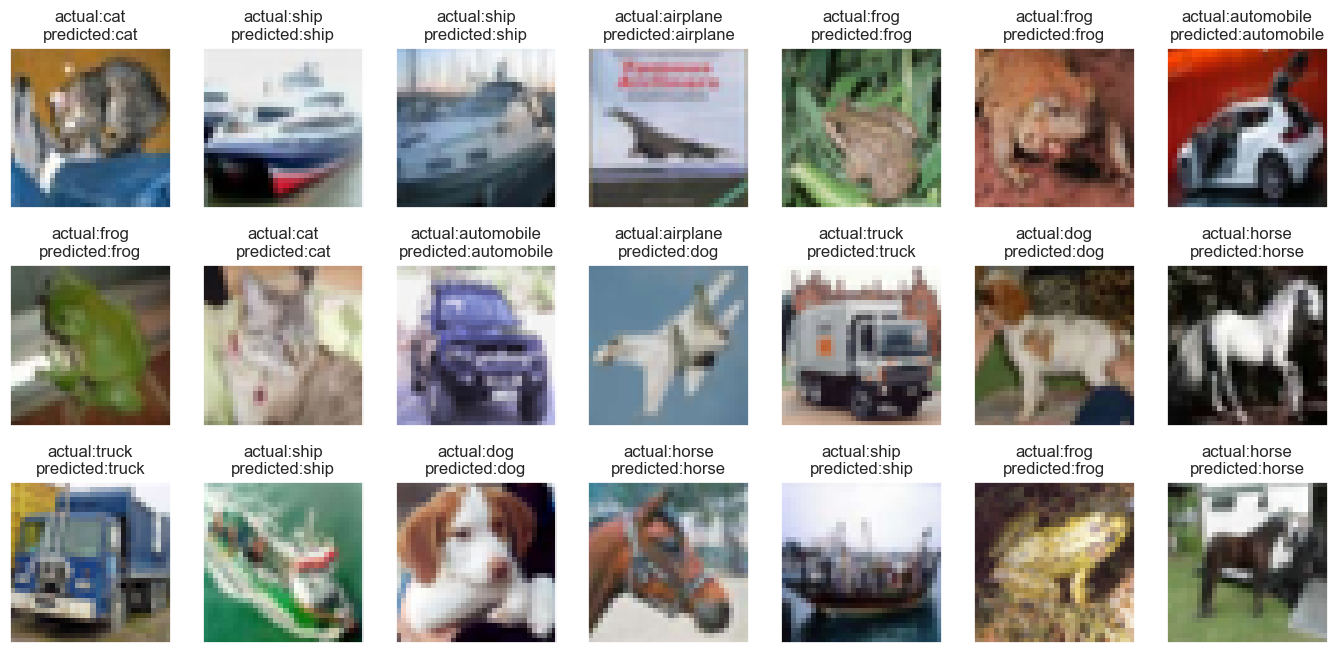

In [46]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

313/313 [==============================] - 7s 24ms/step


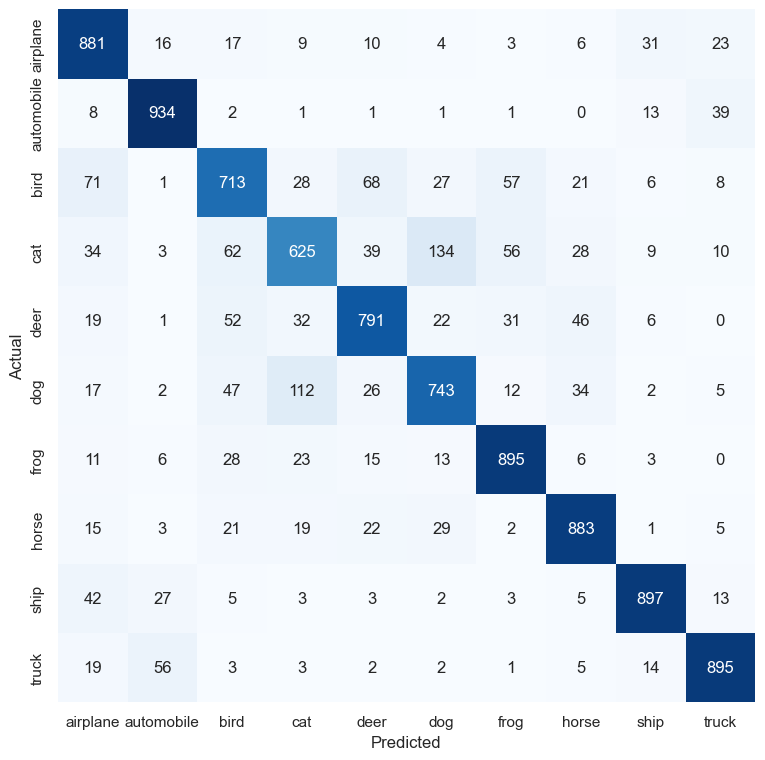

In [47]:
# Predicting test data
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

#y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()